## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [3]:
import pandas as pd
import numpy as np
import random
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
# read the dataset,and print the top few rows
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# print the number of rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# print the number of unique users in the dataset
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
# print proportion of users converted
(df['converted']==1).mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# number of times new page and treatment don't match
df.query('group == "treatment" & landing_page == "old_page"').shape[0] + df.query('group == "control" & landing_page == "new_page"').shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
# check if any of the rows have missing values
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [6]:
# make new dataframe df2 in which treatment matches the new_page and control matches the old page
df2=df.query('group == "treatment" & landing_page == "new_page" or group == "control" & landing_page == "old_page"')

In [7]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# number of unique users in df2
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# the duplicated user id
df2[df2['user_id'].duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
# row information for the duplicated user id
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [8]:
# remove one duplicated row and then check it's okay or not
df2.drop(df2[df2.user_id.duplicated()].index, inplace=True)
df2[df2['user_id'].duplicated()]

C:\Users\EL7md\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# probability of converted
(df2['converted']==1).mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [6]:
# extract only rows with control group, then compute the probability of converted
control_df=df2.query('group == "control"')
cc=(control_df['converted']==1).mean()
cc

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [7]:
# extract only rows with treatment group, then compute the probability of converted
treatment_df=df2.query('group == "treatment"')
tc=(treatment_df['converted']==1).mean()
tc

0.11880806551510564

d. What is the probability that an individual received the new page?

In [8]:
# probability that an individual received the new page 
(df2['landing_page']=="new_page").mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**From those probabilities we can conclude the following:**
###### the probability of converted for control group is slightly greater than the probability of converted for the treatment group despite the probability of an individual received the new page is 0.5 
###### So i think there is still no sufficient evidence to say that the new treatment page leads to more conversions, as their probabilites are very close.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**1.H0: 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 <= 0**

**2.H1: 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [9]:
# converted rate of pnew
cr_𝑝𝑛𝑒𝑤=df2['converted'].mean()
cr_𝑝𝑛𝑒𝑤

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [10]:
# converted rate of pold
cr_𝑝old=df2['converted'].mean()
cr_𝑝old

0.11959708724499628

c. What is $n_{new}$?

In [11]:
#the number of individuals in the treatment group
𝑛𝑛𝑒𝑤=(df2['group']=="treatment").sum()
𝑛𝑛𝑒𝑤

145310

d. What is $n_{old}$?

In [12]:
#the number of individuals in the control group
𝑛𝑜𝑙𝑑 =(df2['group']=="control").sum()
𝑛𝑜𝑙𝑑

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [13]:
# simulate new page converted
new_page_converted=np.random.choice([0,1],size=𝑛𝑛𝑒𝑤,p=[(1-cr_𝑝𝑛𝑒𝑤),cr_𝑝𝑛𝑒𝑤])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [14]:
# simulate old page converted
old_page_converted=np.random.choice([0,1],size=𝑛𝑜𝑙𝑑,p=[(1-cr_𝑝old),cr_𝑝old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [15]:
# observed difference between new page converted and old page converted
obs_diff=(new_page_converted).mean() - (old_page_converted).mean()
obs_diff

0.0008030989472495725

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [16]:
# simulate 10000 𝑝𝑛𝑒𝑤  - 𝑝𝑜𝑙𝑑
p_diffs=[]
for _ in range(10000):
    new_page_converted = np.random.choice([0,1],size=𝑛𝑛𝑒𝑤,p=[(1-cr_𝑝𝑛𝑒𝑤),cr_𝑝𝑛𝑒𝑤])
    old_page_converted = np.random.choice([0,1],size=𝑛𝑜𝑙𝑑,p=[(1-cr_𝑝old),cr_𝑝old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
p_diffs=np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  12.,  143.,  592., 1913., 2778., 2634., 1432.,  403.,   84.,
           9.]),
 array([-0.00445528, -0.00353777, -0.00262027, -0.00170276, -0.00078526,
         0.00013224,  0.00104975,  0.00196725,  0.00288476,  0.00380226,
         0.00471976]),
 <a list of 10 Patch objects>)

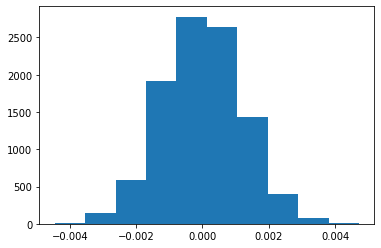

In [49]:
# histogram plotting of p_diffs, looks like a normal distribution
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

0.9006

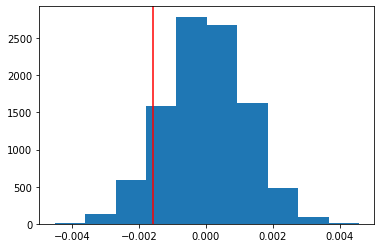

In [50]:
# compute the actual difference
actual_diff=tc-cc
# plot the under null and the the actual value histogram
under_null=np.random.normal(0,p_diffs.std(),10000)
plt.hist(under_null)
plt.axvline(x=actual_diff,color='red')
# compute the p-value
(under_null>actual_diff).mean()

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**1. i computed the p-value and its equal 0.90.**

**2. the value mean that with 95% confidence which the value is greater than 0.05 so there is no statistical significant.**

**3. so i reject the alternative hypothesis, and accept the null hypothesis or fail to reject the null.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [13]:
import statsmodels.api as sm
# compute the number of conversions for each page
old_df=df2.query('landing_page == "old_page"')
new_df=df2.query('landing_page == "new_page"')
convert_old = (old_df['converted']==1).sum()
convert_new = (new_df['converted']==1).sum()
# compute the number of rows for each page
n_old = (df2['landing_page']=="old_page").sum()
n_new = (df2['landing_page']=="new_page").sum()
print(convert_old)
print(convert_new)
print(n_old)
print(n_new)

17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [18]:
# compute the z-score and the p-value
stat, pval = proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
print(stat)
print(pval)

1.3109241984234394
0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**They mean the same as the findings in part j and k, there is no statistically significant difference**

**fail to reject the null, and therefore reject the alternative**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**i think logistic regression is more appropriate**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [9]:
# create an intercept and dummy variables
df2['intercept']=1      
df2['ab_page']=pd.get_dummies(df2['landing_page'])['new_page']
df2.head()

C:\Users\EL7md\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\EL7md\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [21]:
# instantiate a logistic regression instance
log_r=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
# fit the model
results=log_r.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [22]:
# output the summary statistics
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 07 Nov 2020   Pseudo R-squ.:               8.077e-06
Time:                        23:39:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value equals 0.190, and it differs because the null and alternative hypothesis are different which looks like:**

**H0:Pnew = Pold**

**H1:pnew != Pold**

**we made dummy variables, and choose old page to be the baseline**


In [23]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

**the p-value conclude that there is no statistical significance to accept the alternative, so we fail to reject the null, as the difference is too small in conversion**

**the interpratation also tells us that when an individual uses the new page he/she is 0.98 more likely to make conversion which is too small**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**it's a good idea to consider other factors, which can have an effect on the conversion, and as the previous factor does not make a difference or is not a statistically significant, so considering new factors is a good idea**

**the disadvantage is the multicolinaraty between the variables**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [10]:
# read the countries dataframe and merge it with df2 dataframe
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [11]:
### Create the necessary dummy variables
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])

In [14]:
### Fit Your Linear Model And Obtain the Results
new_log_r=sm.Logit(df_new['converted'],df_new[['intercept','CA','UK']])
result=new_log_r.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 08 Nov 2020   Pseudo R-squ.:               1.521e-05
Time:                        19:56:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [30]:
print(np.exp(result.params))
print(1/np.exp(result.params))

intercept    0.135779
CA           0.960018
UK           1.009966
dtype: float64
intercept    7.364925
CA           1.041647
UK           0.990133
dtype: float64


**The p-values indicate that there is no statistical significance, and it's too small also**

**If an individual is from US he/she is 1.041647 more likely to make a conversion than if he/she is from CA, keeping all other variables constant.**


**If an individual is from US he/she is 0.9901 more likely to make a conversion than if he/she is from UK, keeping all other variables constant.**

**therfore the country variable does not make an influence**

In [15]:
# make another logistic regression with adding ab_page column
logit_ab = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','CA']])
results_3 = logit_ab.fit()
results_3.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 08 Nov 2020   Pseudo R-squ.:               2.323e-05
Time:                        19:57:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

In [33]:
np.exp(results_3.params)

intercept    0.136795
ab_page      0.985168
UK           1.009932
CA           0.960062
dtype: float64

**The p-values indicate also there is no statastical significant**
**The coef indicate the following:**
1. if the individual uses the new page he is 0.985 more likely to make conversion than the old page, keeping the other variables constant.
2. if the indvidual is from Uk he is 1.009 more likely to make conversion than the Us person, keeping the other variables constant.
3. if the indvidual is from CA he is 0.96 more likely to make conversion than the Us person, keeping the other variables constant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [19]:
# interpreting with interaction
df_new['UK_ab_page']= df_new['ab_page'] * df_new['UK'] 
df_new['CA_ab_page']= df_new['ab_page'] * df_new['CA']  
logit_4 = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','UK_ab_page','CA_ab_page','UK','CA']])
result_4 = logit_4.fit()
result_4.summary()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 08 Nov 2020   Pseudo R-squ.:               3.482e-05
Time:                        20:25:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
CA_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
==============================================================================
"""

In [20]:
np.exp(result_4.params)

intercept     0.137178
ab_page       0.979646
UK_ab_page    1.031896
CA_ab_page    0.954198
UK            0.994272
CA            0.982625
dtype: float64

**The p-values is also too small, so those have no statastical significant**

**Convertion is 1.03  more for UK and new page users than US and new page users, holding all other varible constant.**

**Convertion is 0.95  more for CA and new page users than US and new page users, holding all other varible constant.**

<a id='conclusions'></a>
## Conclusions

**After those 3 ways of analysis "probability-hypothesis testing-regression" i can conclude the following:**

1. The included variables don't have a significant effect on the conversion.
2. Also the The interaction dosen't have a significant effect on the conversion.
3. So i reject the alternative, and fail to reject the null.
4. so the suitable decision is to continue with the old version page.

